In [1]:
import os
import sys

# Путь к директории, где находится текущий ноутбук
NOTEBOOK_DIR = os.path.abspath(os.path.dirname("__file__"))  # работает в Jupyter

# Поднимаемся на один уровень вверх – получаем корень проекта
PROJECT_ROOT = os.path.abspath(os.path.join(NOTEBOOK_DIR, os.pardir, 'src'))

# Добавляем корень в начало sys.path, если его там ещё нет
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from afr3d.drafting.views import select_main_views, build_linear_view

from afr3d.drafting.views import (
    select_main_views, analyze_view_candidates, _compute_obb,
    _gpdir_scaled, _run_hlr_for_direction, ViewHLRStats,
    _sum_edge_lengths_from_compounds, _sum_edge_lengths,
    build_linear_view
)
from afr3d.io.step_import import load_step

from OCC.Core.Bnd import Bnd_OBB
from OCC.Core.BRepBndLib import brepbndlib_AddOBB
from OCC.Core.gp import gp_Dir, gp_Pnt, gp_Ax2
from OCC.Core.HLRAlgo import HLRAlgo_Projector
from OCC.Core.HLRBRep import HLRBRep_Algo, HLRBRep_HLRToShape
from OCC.Core.BRepGProp import brepgprop_LinearProperties
from OCC.Core.GProp import GProp_GProps

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
shape = load_step("../data/example_complex.stp")

In [4]:
from afr3d.io.step_import import load_step
from afr3d.drafting.views import select_main_views, build_linear_view

shape = load_step("../data/example_complex.stp")
view_set = select_main_views(shape)

front_segs = build_linear_view(shape, view_set.front)
top_segs   = build_linear_view(shape, view_set.top)
side_segs  = build_linear_view(shape, view_set.side)

print("front:", len(front_segs), "segments")
print("top:  ", len(top_segs), "segments")
print("side: ", len(side_segs), "segments")
front_segs[:5]

c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:162: DeprecationWarning: Call to deprecated function brepbndlib_AddOBB since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepbndlib.AddOBB
  brepbndlib_AddOBB(shape, obb, True, True, True)
c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:101: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(exp.Current())
c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:101: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(exp.Current())
c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:101: DeprecationWarnin

front: 846 segments
top:   890 segments
side:  932 segments


[ProjectedSegment2D(x1=2247.1173806937595, y1=902.3796173454092, x2=2256.781016385467, y2=901.9287386541222, visible=True),
 ProjectedSegment2D(x1=2256.7810163854683, y1=901.9287386541116, x2=2321.0337926684997, y2=898.8573277754964, visible=True),
 ProjectedSegment2D(x1=2380.213470114035, y1=814.323806688391, x2=2330.9839221806506, y2=816.6770772833584, visible=True),
 ProjectedSegment2D(x1=2319.2293263584156, y1=817.238970411884, x2=2254.9765500753874, y2=820.3103812904986, visible=True),
 ProjectedSegment2D(x1=2254.9765500753883, y1=820.3103812905385, x2=2245.3129143836795, y2=820.7612599818259, visible=True)]

c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:162: DeprecationWarning: Call to deprecated function brepbndlib_AddOBB since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepbndlib.AddOBB
  brepbndlib_AddOBB(shape, obb, True, True, True)
c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:101: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(exp.Current())
c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:101: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(exp.Current())
c:\Users\dreck\Documents\make_drafting\src\afr3d\drafting\views.py:101: DeprecationWarnin

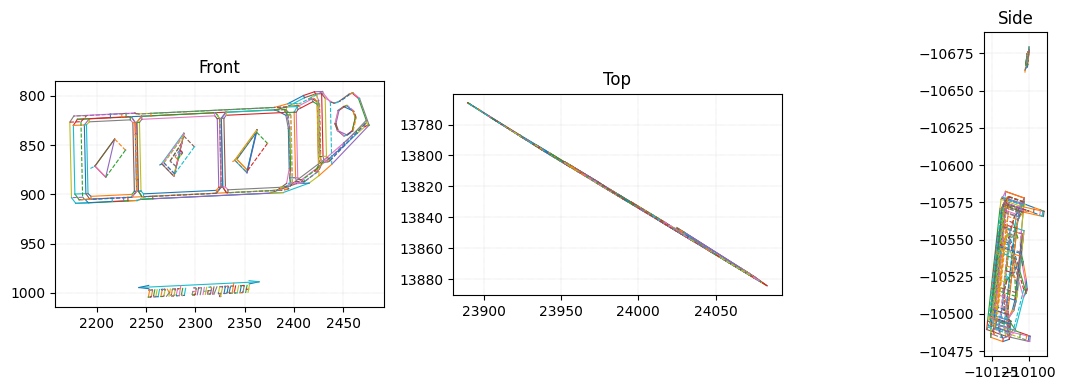

In [5]:
view_set = select_main_views(shape)

front_segs = build_linear_view(shape, view_set.front)
top_segs   = build_linear_view(shape, view_set.top)
side_segs  = build_linear_view(shape, view_set.side)

def plot_view(ax, segments, title: str):
    for seg in segments:
        style = "-" if seg.visible else "--"
        ax.plot([seg.x1, seg.x2], [seg.y1, seg.y2], style, linewidth=0.8)
    ax.set_aspect("equal", "box")
    ax.invert_yaxis()  # как на чертеже: вверх на экране = вверх на листе
    ax.set_title(title)
    ax.grid(True, linestyle=":", linewidth=0.3)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_view(axes[0], front_segs, "Front")
plot_view(axes[1], top_segs,   "Top")
plot_view(axes[2], side_segs,  "Side")

plt.tight_layout()
plt.show()